# 0. Introduction (Ryan or Alina?) Ryan please :)

Pre-requisites, learning goals, format, etc...

# 1. Brief Jupyter overview (Aaron)

## 1.1 Installation, environments; get oriented

Q: What is the difference between `pip install`, versus Conda (or Miniconda, Anaconda), versus `virtualenv`?  (mainly for OS X and Unix users)

A: python + libraries are installed and "searched for" in different places (roughly speaking).

__TODO__ need a transcript of shell commands for this exercise, not done yet --ATr, 2022 July 18

We will open up and use a _terminal_ to see where Python and Jupyter are installed.  Relevant commands:
`which`, `pip install`, `pip install --local`, `conda`.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
np.__version__

In [ ]:
np.__file__

## 1.2 Using and navigating Jupyter

* Code and text cells.
* Command vs. insert mode: mouse click, `Esc`, `Return`
* Execute cell: `Shift`+`Return`
* Keyboard shortcuts in command mode: `a`, `b`, `x`, `c`, `v`, `dd`, `z`
* "Restart kernel and run all cells"

In [ ]:
x = 10

In [ ]:
y = 1

In [ ]:
x + y  # during interactive Jupyter or IPython session, this is the same as print(x+y)

In [ ]:
y = 20


## 1.3 Useful tricks

Markdown allows rich content: images, equations, HTML.  Example of a LaTeX equation that you can edit:

$$
  \sum_{n=0}^{\infty} \frac{1}{x^n} = \frac{1}{1-1/x}
$$

The IPython kernel within Jupyter has many useful tricks.  Let's look at a few:
* `?` to get help, `??` to look at source.
* `%history` ("%" commands are called "line magics")
* `%%timeit` to benchmark your code ("%%" commands are called "cell magics")
* `%matplotlib inline`
* `%load_ext autoreload`

In [ ]:
range?

In [ ]:
for x in range(10):
    print(x)

In [ ]:
#%%timeit
x = 0
for y in range(10000):
    x += y
print(x)

In [ ]:
%history -l 5

In [ ]:
x = np.arange(100)
y = np.random.random(100)

In [ ]:
plt.plot(x,y)
plt.show()

In [ ]:
%matplotlib inline

In [ ]:
import my_module

In [ ]:
my_module.foobar(10)

In [ ]:
%load_ext autoreload

%autoreload 2

## 1.4 Other notes

* How to run Jupyter notebook from a remote computer (e.g., if you have many GB or TB of data that won't fit on your computer): https://confluence.columbia.edu/confluence/display/rcs/Ginsburg+-+Job+Examples#GinsburgJobExamples-JupyterNotebooks

## 1.5 References and Further Reading

* Intro to Python, Jupyter, Pandas, Matplotlib: http://swcarpentry.github.io/python-novice-gapminder/

* IPython magic commands (`%` and `%%`): https://ipython.readthedocs.io/en/stable/interactive/magics.html

* IPython autoreload: https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html

# 2. Getting the most out of NumPy

Python, in general, is slow; compared to compiled languages like C and Fortran, Python is woefully inefficient. But, this is where the magic of NumPy come into play: by wrapping C data structures and methods in Python commands, NumPy drastically speeds up array operations and numerical calculations. Learning to use NumPy properly 

In [ ]:
# python lists vs. numpy arrays; memory comparison and append comparison

In [ ]:
# loop vs. array operations demo; examples of where we can get rid of loops

In [ ]:
# array slicing, np.where, and masking

In [ ]:
# np.vectorize and numpy functional programming

This is an introduction to stuff 

In [ ]:
# Alina's stuff

In [ ]:
# Useful Scipy functions (scipy.)

In [ ]:
from scipy.optimize import curve_fit, fsolve
from scipy import interpolate

In [ ]:
#define Planck's function
def BB_lambdaT(l, T):
  
  #define constants (SI units)
  hplanck=6.62607015e-34 #m^2kg/s
  clight=299792458. #m/s
  kb=1.380649e-23 #m^2kg/(s^2K^1)
  
  return (2.*hplanck*clight**2/l**5)/(np.exp(hplanck*clight/(l*kb*T))-1.)


In [ ]:

lambda_sun=np.linspace(100e-9, 2000e-9, 100) #wavelength range [m]
T_sun=5778 # sun's temp [K]
sun_BB=BB_lambdaT(lambda_sun, T_sun)
noise=0.2*np.random.normal(size=len(lambda_sun))
sun_data=BB_sun+noise

In [ ]:
BB_params, BB_cov = curve_fit(BB_lambdaT, sun_data, ydata)

Text(0, 0.5, 'intensity [kW/m$^{2}$/nm]')

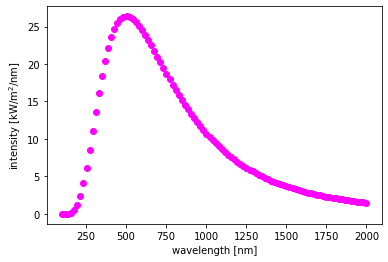

In [ ]:
plt.figure()
plt.scatter(lambda_sun*1.e9, BB_sun_data/1.e12, marker='o',label='data', color='magenta')
plt.xlabel('wavelength [nm]')
plt.ylabel(r'intensity [kW/m$^{2}$/nm]')

In [ ]:
## curve_fit

In [ ]:
## interpolate

In [ ]:
## 

In [ ]:
# Reading & Writing Files with NumPy and AstroPy

# 4. Check your work with units and constants in AstroPy

What is inside astropy's `units` submodule?  Quoting the [documentation](https://docs.astropy.org/en/stable/units/index.html),

> `astropy.units` handles defining, converting between, and performing arithmetic with physical quantities, such as meters, seconds, Hz, etc. It also handles logarithmic units such as magnitude and decibel.
> 
> `astropy.units` does not know spherical geometry or sexagesimal (hours, min, sec): if you want to deal with celestial coordinates, see the `astropy.coordinates` package.

We'll explore how to use astropy `units`, and how it can help us guard against bugs and mistakes.

## 4.1 Overview of astropy.units

Just a glimpse, not comprehensive -- there's more in the documentation and various online tutorials.

### Start by playing around with some built-in units, to see what's possible.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy

from astropy import units as u

%matplotlib inline

In [2]:
u.m

Unit("m")

In [3]:
u.meter

Unit("m")

In [4]:
u.picometer

Unit("pm")

In [5]:
u.picometer.to(u.m)  # ask audience: give me a unit!

1e-12

In [6]:
u.picometer.to(u.g)  # ask audience: give me another unit! (make sure to do both length & "not-length")

UnitConversionError: 'pm' (length) and 'g' (mass) are not convertible

In [7]:
force = 5 * u.m * u.kg / u.s**2

In [8]:
force

<Quantity 5. kg m / s2>

In [9]:
type(force)

astropy.units.quantity.Quantity

In [10]:
type(force.value)

float

In [11]:
force.value

5.0

In [12]:
force.unit

Unit("kg m / s2")

In [13]:
force.cgs

<Quantity 500000. dyn>

In [14]:
force.si

<Quantity 5. J / m>

## 4.2 Doing math with units

Let's return to the Planck blackbody function as a motivating example.

$$
    B_{\lambda}(\lambda, T)
    = \frac{2 h c^2}{\lambda^5}
    \frac{1}{\exp\left(\frac{hc}{\lambda k_B T} -1\right)}
$$

with Planck's constant $h$, speed of light $c$, and Boltzmann constant $k_B$.

Planck's function, expressed in per-wavelength form ($B_\lambda$ rather than $B_\nu$), has units of radiance per wavelength.  That is power per steradian per area per wavelength.  Phew!

### How would we program this function with units?  How does having units help us?

Note: we need to attach the "per-steradian" piece manually.  Angular units like radians and steradians are dimensionless, and steradians don't already show up in the constants $h$, $c$, $k_B$, nor in our inputs $\lambda$, $T$.

In [15]:
def BB_lambdaT(l, T):
    hplanck=6.62607015e-34 #m^2kg/s
    clight=299792458. #m/s
    kb=1.380649e-23 #m^2kg/(s^2K^1)
    return (2.*hplanck*clight**2/l**5)/(np.exp(hplanck*clight/(l*kb*T))-1.)

In [16]:
from astropy import constants as const

In [17]:
const.h

<<class 'astropy.constants.codata2014.CODATA2014'> name='Planck constant' value=6.62607004e-34 uncertainty=8.1e-42 unit='J s' reference='CODATA 2014'>

In [18]:
const.c

<<class 'astropy.constants.codata2014.CODATA2014'> name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2014'>

In [19]:
const.k_B

<<class 'astropy.constants.codata2014.CODATA2014'> name='Boltzmann constant' value=1.38064852e-23 uncertainty=7.9e-30 unit='J / K' reference='CODATA 2014'>

In [20]:
def BB_lambdaT(l, T):
    hplanck = const.h
    clight = const.c
    kb = const.k_B
    return (2.*hplanck*clight**2/l**5)/(np.exp(hplanck*clight/(l*kb*T))-1.) / u.sr

### Now, if we forget to put in units, we get a `UnitConversionError`.

In [21]:
BB_lambdaT(400e-9, 5778)

UnitTypeError: Can only apply 'exp' function to dimensionless quantities

### With units, it seems to work!

In [22]:
BB_lambdaT(400*u.nm, 5778*u.K)

<Quantity 2.30621906e-32 J m2 / (nm5 s sr)>

### Let's try converting it to the expected form, power per solid angle per area per wavelength.

In [23]:
BB_lambdaT(400*u.nm, 5778*u.K).to(u.Watt/u.sr/u.m**2/u.m)

<Quantity 2.30621906e+13 W / (m3 sr)>

### What if we accidentally swap the order of our inputs?

Units will give an extra hint that something is amiss.  You may not have memorized the typical magnitude of the Sun's spectral radiance, but you might more easily recognize that $\mathrm{Kelvin}^5$ looks fishy in the denominator.

In [24]:
BB_lambdaT(5778*u.K, 400*u.nm)

<Quantity 3.66701618e-38 J m2 / (K5 s sr)>

### The units submodule works seamlessly with numpy and matplotlib.

In [25]:
lambda_sun = np.linspace(100e-9, 2000e-9, 100) * u.m #wavelength range [m]
T_sun = 5778 * u.K # sun's temp [K]
sun_BB = BB_lambdaT(lambda_sun, T_sun)

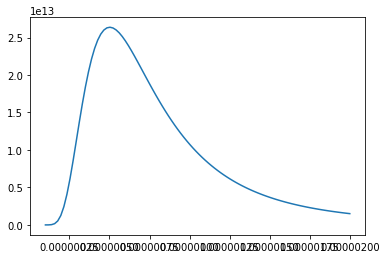

In [26]:
plt.plot(lambda_sun, sun_BB)
plt.show()

### The units submodule has a nice auto-labeling feature with matplotlib, too.

In [27]:
from astropy import visualization

In [28]:
astropy.visualization.quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f6c6aae9d50>

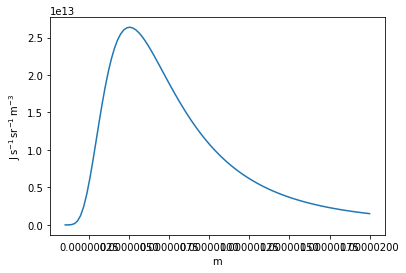

In [29]:
plt.plot(lambda_sun, sun_BB)
plt.show()

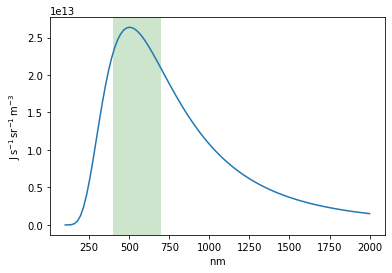

In [30]:
plt.plot(lambda_sun.to(u.nm), sun_BB)
plt.axvspan(4000*u.Angstrom, 7000*u.Angstrom, facecolor='g', alpha=0.2)
plt.show()

### Now that we have a nice, clean working function, let's add a "docstring" to finish the job.

In [31]:
def BB_lambdaT(l, T):
    """
    Planck's blackbody function per unit wavelength
    Reference: Zombeck, Handbook of Space Astronomy and Astrophysics, 2nd Ed., page 268.
    
    Arguments:
        l: wavelength in astropy units (length), scalar or array
        T: temperature in astropy units (Kelvin), scalar or array
    Returns:
        value(s) of Planck's function evaluated at (l, T) with astropy units attached
    """
    hplanck = const.h
    clight = const.c
    kb = const.k_B
    return (2.*hplanck*clight**2/l**5)/(np.exp(hplanck*clight/(l*kb*T))-1.) / u.sr

## 4.3 Extra: a little more "defensive programming"

We've seen that astropy units can help us write correct, concise, and more readable code, and we've seen that the units submodule works cleanly with `numpy` and `matplotlib`.

__Exercise:__ what if we give correct units, but unphysical values to the blackbody function?  Try modifying the function `BB_lambdaT(...)` to prevent the user from inputting negative values.  You might use: `assert`, `raise Exception`, `np.any(...)`, `np.all(...)`.

As you modify the function, make sure it works on previous input (both scalar and array).  This is called "regression testing", to check that new changes to your function don't cause it to regress in other unexpected ways.

In [32]:
BB_lambdaT(-100*u.m, -1000*u.K)

<Quantity -8.27815967e-20 J / (m3 s sr)>

### Let's add assertion checks for `l` and `T`

In [33]:
def BB_lambdaT(l, T):
    """
    Planck's blackbody function per unit wavelength
    Reference: Zombeck, Handbook of Space Astronomy and Astrophysics, 2nd Ed., page 268.
    
    Arguments:
        l: wavelength in astropy units (length), scalar or array. Must be >= 0.
        T: temperature in astropy units (Kelvin), scalar or array. Must be >= 0.
    Returns:
        value(s) of Planck's function evaluated at (l, T) with astropy units attached
    """
    assert l >= 0
    assert T >= 0
    hplanck = const.h
    clight = const.c
    kb = const.k_B
    return (2.*hplanck*clight**2/l**5)/(np.exp(hplanck*clight/(l*kb*T))-1.) / u.sr

### The function throws an error for negative scalar inputs, as desired.

In [34]:
BB_lambdaT(-100*u.m, -1000*u.K)

AssertionError: 

### Verify that the function works on previous input by trying to re-generate the plot we made above.

In [35]:
lambda_sun = np.linspace(100e-9, 2000e-9, 100) * u.m #wavelength range [m]
T_sun = 5778 * u.K # sun's temp [K]
sun_BB = BB_lambdaT(lambda_sun, T_sun)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Woops, we did break something!  Let's fix it.

The code `l >= 0` returns a numpy array of Booleans.  As the error message says, the truth value of an array with more than one message is ambiguous: should we treat `[True, False, False, True, True]` as `True` or `False`??  Let's guard against _any_ negative input values for wavelength or temperature by using `np.any(...)`, similar to what is suggested.

Instead of `np.any(l >= 0)`, notice that we could also write `(l >= 0).any()`.

In [36]:
def BB_lambdaT(l, T):
    """
    Planck's blackbody function per unit wavelength
    Reference: Zombeck, Handbook of Space Astronomy and Astrophysics, 2nd Ed., page 268.
    
    Arguments:
        l: wavelength in astropy units (length), scalar or array. Must be >= 0.
        T: temperature in astropy units (Kelvin), scalar or array. Must be >= 0.
    Returns:
        value(s) of Planck's function evaluated at (l, T) with astropy units attached
    """
    assert np.any(l >= 0)
    assert np.any(T >= 0)
    hplanck = const.h
    clight = const.c
    kb = const.k_B
    return (2.*hplanck*clight**2/l**5)/(np.exp(hplanck*clight/(l*kb*T))-1.) / u.sr

In [37]:
lambda_sun = np.linspace(100e-9, 2000e-9, 100) * u.m #wavelength range [m]
T_sun = 5778 * u.K # sun's temp [K]
sun_BB = BB_lambdaT(lambda_sun, T_sun)

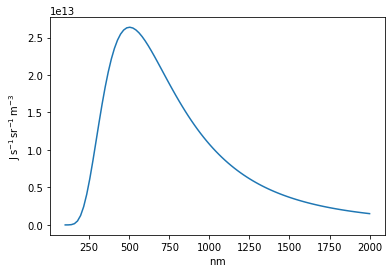

In [38]:
plt.plot(lambda_sun.to(u.nm), sun_BB)
plt.show()

### Our function passes the "regression test".  Let's re-confirm that it gives the correct error for either negative scalar or array input.

In [39]:
lambda_sun = np.linspace(100e-9, 2000e-9, 100) * u.m #wavelength range [m]
T_sun = -1 * 5778 * u.K # sun's temp [K]
sun_BB = BB_lambdaT(lambda_sun, T_sun)

AssertionError: 

In [40]:
BB_lambdaT(-100*u.m, -1000*u.K)

AssertionError: 

## 4.4 Some general remarks

Defensive programming is not a cure-all!  Bugs can come in other ways.  It's also possible to be too careful and to clutter your code needlessly.  Some personal taste / practice is involved.

Why should we use astropy units specifically?  What other tools can help us perform calculations with units?
* Wolfram|Alpha, for quick one-off calculations: https://www.wolframalpha.com/
* `yt` and `unyt` provide unit-aware interfaces for simulation outputs: https://yt-project.org/
* Many other specialized packages will provide their own unit packages.  Different packages / systems may not talk easily with one another (but, can be aided by projects like `yt`).  Example from a well-used simulation code: https://arepo-code.org/wp-content/userguide/parameterfile.html#system-of-units


## 4.5 References

* Documentation: https://docs.astropy.org/en/stable/units/index.html
* Tutorials on astropy units specifically:
  + (recommended) https://learn.astropy.org/tutorials/quantities.html
  + https://astropy4cambridge.readthedocs.io/en/latest/_static/Astropy%20-%20Unit%20Conversion.html

# 5. Parting thoughts on scientific computing, generally


* Digging deeper: what's in the `[source]`?
  https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html


* Mathematica notebooks (from 1988, before Python's first release in 1991(!)) helped pave the way towards IPython / Jupyter.  A powerful tool, especially for symbolic math.  Downsides: proprietary/closed source, cost.  Free license for Columbia students: https://www.cuit.columbia.edu/content/mathematica


* Some suggested best practices in scientific computing: https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.1001745